In [ ]:
#Problem is to analyse whether a car is in good condition or not

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sreeragh97","key":"b5226bc28495ca8a2a9f440f0a1b8390"}'}

In [ ]:
mkdir ~/.kaggle

In [ ]:
cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d elikplim/car-evaluation-data-set

  0% 0.00/4.66k [00:00<?, ?B/s]
100% 4.66k/4.66k [00:00<00:00, 8.45MB/s]


In [ ]:
!mkdir cars

In [ ]:
!ls

car-evaluation-data-set.zip  cars  kaggle.json	sample_data


In [ ]:
!unzip car-evaluation-data-set.zip -d cars

Archive:  car-evaluation-data-set.zip
  inflating: cars/car_evaluation.csv  


In [ ]:
!ls cars

car_evaluation.csv


In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import tensorflow as tf

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
print(tf.__version__)

2.3.0


In [ ]:
cols = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety','output']
data = pd.read_csv('/content/cars/car_evaluation.csv',names = cols,header=None)

In [ ]:
data.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
#Data Analysis and preprocessing
plot_size = plt.rcParams["figure.figsize"]
plot_size [0] = 8
plot_size [1] = 6
plt.rcParams["figure.figsize"] = plot_size

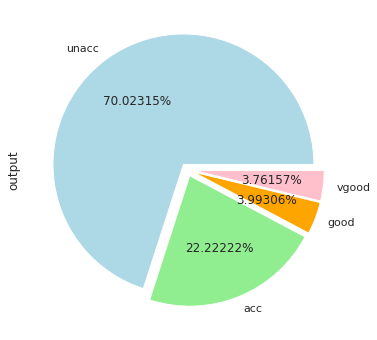

In [ ]:
data.output.value_counts().plot(kind='pie', autopct='%0.05f%%', colors=['lightblue', 'lightgreen', 'orange', 'pink'], explode=(0.05, 0.05, 0.05,0.05))

In [ ]:
#All the columns in our dataset are categorical. 
#Deep learning is based on statistical algorithms and statistical algorithms work with numbers. 
#Therefore, we need to convert the categorical information into numeric column
# There are various approaches to do that but one of the most common approach is one-hot encoding. 

In [ ]:
price = pd.get_dummies(data.price, prefix='price')
maint = pd.get_dummies(data.maint, prefix='maint')

In [ ]:
doors = pd.get_dummies(data.doors, prefix='doors')
persons = pd.get_dummies(data.persons, prefix='persons')

lug_capacity = pd.get_dummies(data.lug_capacity, prefix='lug_capacity')
safety = pd.get_dummies(data.safety, prefix='safety')

labels = pd.get_dummies(data.output, prefix='condition')

In [ ]:
#To get the feature set,the columns are merged
X = pd.concat([price, maint, doors, persons, lug_capacity, safety] , axis=1)

In [ ]:
labels.head()

,condition_acc,condition_good,condition_unacc,condition_vgood
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [ ]:
y = labels.values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
#Deep learning starts here!!!
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

In [ ]:
input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(15, activation='relu')(input_layer)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)
output = Dense(y.shape[1], activation='softmax')(dense_layer_2)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 21)]              0         
_________________________________________________________________
dense (Dense)                (None, 15)                330       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 44        
Total params: 534
Trainable params: 534
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, batch_size=8, epochs=60, verbose=1, validation_split=0.2)

Epoch 1/60
130/130 [==============================] - 0s 2ms/step - loss: 1.1405 - acc: 0.5618 - val_loss: 0.9204 - val_acc: 0.6462
Epoch 2/60
130/130 [==============================] - 0s 1ms/step - loss: 0.7145 - acc: 0.7230 - val_loss: 0.7419 - val_acc: 0.6462
Epoch 3/60
130/130 [==============================] - 0s 1ms/step - loss: 0.5591 - acc: 0.7625 - val_loss: 0.6040 - val_acc: 0.7500
Epoch 4/60
130/130 [==============================] - 0s 1ms/step - loss: 0.4482 - acc: 0.8263 - val_loss: 0.5273 - val_acc: 0.8000
Epoch 5/60
130/130 [==============================] - 0s 1ms/step - loss: 0.3818 - acc: 0.8687 - val_loss: 0.4847 - val_acc: 0.8231
Epoch 6/60
130/130 [==============================] - 0s 1ms/step - loss: 0.3393 - acc: 0.8803 - val_loss: 0.4415 - val_acc: 0.8615
Epoch 7/60
130/130 [==============================] - 0s 1ms/step - loss: 0.3092 - acc: 0.8919 - val_loss: 0.4117 - val_acc: 0.8423
Epoch 8/60
130/130 [==============================] - 0s 1ms/step - loss: 0.

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

14/14 [==============================] - 0s 950us/step - loss: 0.0546 - acc: 0.9769
Test Score: 0.054562587291002274
Test Accuracy: 0.9768518805503845


In [ ]:
#The model achieves an accuracy of 97.39% on the test set
#Though it is slightly less than the training accuracy of 100%
#it is still very good given the fact that we randomly chose the number of layers and the nodes